# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Athiya Puteri Hidayat
- **Email:** athiyaputeri19@gmail.com
- **ID Dicoding:** athiyaputeri

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
  Pada musim apa penyewaan sepeda tertinggi dan terendah di tahun 2011 dan 2012?
- Pertanyaan 2
  Pada hari apa rata-rata orang menyewwa sepeda?
  

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Pada data wrangling kumpulan kegiatan dari gathering data, assessing data, cleaning data. Untuk melanjutkan tahap ini diperlukan import package yang dibutuhkan. Karena sebelum ini sudah dilakukan import data, maka dapat dilanjutkan ke proses selanjutnya.

### Gathering Data

Pada tahap ini merupakan tahap pengumpulan semua data yang dibutuhkan.

In [5]:
# Memuat data day.csv
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# Memuat data hour.csv
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Pada tahap ini saya akan menilai kualitas dari dari data hour.csv dan day.csv

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dapat dilihat untuk column dteday massih memiliki data type yang tidak sesuai dengan data type seharusnya.

In [10]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Pada tahap di atas, dapat dilihat bahwa tidak terdapat missing value pada dataset day.csv

In [11]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Pada tahap di atas, dapat dilihat bahwa tidak terdapat data yang terduplikat pada dataset day.csv

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Pada tabel stistik di atas tidak terapat keanehan pada data

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dapat dilihat untuk column dteday massih memiliki data type yang tidak sesuai dengan data type seharusnya.

In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Pada tahap di atas, dapat dilihat bahwa tidak terdapat missing value pada dataset hour.csv

In [13]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Pada tahap di atas, dapat dilihat bahwa tidak terdapat data yang terduplikat pada dataset hour.csv

In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pada tabel stistik di atas tidak terapat keanehan pada data

### Cleaning Data

Pada tahap ini merupakan proses pembersihan data yang sudah diidentifikasikan dari proses processing data.

In [38]:
day_df = day_df.drop("instant", axis=1)
hour_df = hour_df.drop("instant", axis=1)

Pada tahap ini terjadi penghapusan column "instant" dikarenakan column ini tidak akan digunakan.

In [15]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

Pada tahap ini terjadi konversi data type dari object menjadi datetime untuk column "dteday" pada dataset day_df dan hour_df.

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Selanjutnya karena saya berencana mengubah datatype column 'season', 'mnth', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit' menjadi datatype category.

In [18]:
day_df['season'] = day_df.season.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

In [20]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [19]:
hour_df['season'] = hour_df.season.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['yr'] = hour_df.yr.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

In [21]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [22]:
season_day = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
day_df['season'] = day_df['season'].map(season_day)

In [23]:
season_hour = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
hour_df['season'] = hour_df['season'].map(season_hour)

Pada tahap ini terjadi mapping/konversi dari data 1, 2, 3, 4 menjadi kategori seperti di atas

In [24]:
year_day = {0: 2011, 1: 2012}
day_df['yr'] = day_df['yr'].map(year_day)

In [25]:
year_hour = {0: 2011, 1: 2012}
hour_df['yr'] = hour_df['yr'].map(year_hour)

Pada tahap ini terjadi mapping/konversi dari data 0 dan 1 menjadi kategori seperti di atas

In [27]:
month_day = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
day_df['mnth'] = day_df['mnth'].map(month_day)

In [26]:
month_hour = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
hour_df['mnth'] = hour_df['mnth'].map(month_hour)

Pada tahap ini terjadi mapping/konversi dari data 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 menjadi kategori seperti di atas

In [28]:
weather_day = {1: 'Clear', 2: 'Misty', 3: 'Light_RainSnow', 4: 'Heavy_RainSnow'}
day_df['weathersit'] = day_df['weathersit'].map(weather_day)

In [29]:
weather_hour = {1: 'Clear', 2: 'Misty', 3: 'Light_RainSnow', 4: 'Heavy_RainSnow'}
hour_df['weathersit'] = hour_df['weathersit'].map(weather_hour)

Pada tahap ini terjadi mapping/konversi dari data 1, 2, 3, 4 menjadi kategori seperti di atas

In [30]:
weekday_day = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
day_df['weekday'] = day_df['weekday'].map(weekday_day)

In [31]:
weekday_hour = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
hour_df['weekday'] = hour_df['weekday'].map(weekday_hour)

Pada tahap ini terjadi mapping/konversi dari data 1, 2, 3, 4, 5, 6 menjadi kategori seperti di atas

In [32]:
workingday_day = {0: 'No', 1: 'Yes'}
day_df['workingday'] = day_df['workingday'].map(workingday_day)

In [33]:
workingday_hour = {0: 'No', 1: 'Yes'}
hour_df['workingday'] = hour_df['workingday'].map(workingday_hour)

Pada tahap ini terjadi mapping/konversi dari data 0 dan 1 menjadi kategori seperti di atas

In [39]:
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Winter,2011,Jan,0,Saturday,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Winter,2011,Jan,0,Sunday,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Winter,2011,Jan,0,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Winter,2011,Jan,0,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Winter,2011,Jan,0,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [40]:
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Winter,2011,Jan,0,0,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Winter,2011,Jan,1,0,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Winter,2011,Jan,2,0,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Winter,2011,Jan,3,0,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Winter,2011,Jan,4,0,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [107]:
# Gabungkan dataset berdasarkan kolom 'dteday'
bike_df = pd.merge(day_df[['dteday', 'weekday']], hour_df, on='dteday', how='inner')

# Drop kolom 'weekday_y' karena kita hanya memerlukan satu kolom 'weekday'
bike_df.drop(columns=['weekday_y'], inplace=True)

# Rename kolom 'weekday_x' menjadi 'weekday'
bike_df.rename(columns={'weekday_x': 'weekday'}, inplace=True)

Pada tahap ini saya me merge data day.csv dan hour.csv  mwnjadi dataframe baru yaitu bike_df

In [109]:
bike_df.head(24)

,dteday,weekday,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Saturday,Winter,2011,Jan,0,0,No,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,Saturday,Winter,2011,Jan,1,0,No,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,Saturday,Winter,2011,Jan,2,0,No,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,Saturday,Winter,2011,Jan,3,0,No,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,Saturday,Winter,2011,Jan,4,0,No,Clear,0.24,0.2879,0.75,0.0000,0,1,1
5,2011-01-01,Saturday,Winter,2011,Jan,5,0,No,Misty,0.24,0.2576,0.75,0.0896,0,1,1
6,2011-01-01,Saturday,Winter,2011,Jan,6,0,No,Clear,0.22,0.2727,0.80,0.0000,2,0,2
7,2011-01-01,Saturday,Winter,2011,Jan,7,0,No,Clear,0.20,0.2576,0.86,0.0000,1,2,3
8,2011-01-01,Saturday,Winter,2011,Jan,8,0,No,Clear,0.24,0.2879,0.75,0.0000,1,7,8
9,2011-01-01,Saturday,Winter,2011,Jan,9,0,No,Clear,0.32,0.3485,0.76,0.0000,8,6,14


## Exploratory Data Analysis (EDA)

Pada tahap ini melakukan eksplorasi terhadap data

### Explore ...

In [110]:
bike_df.describe(include="all")

<ipython-input-110-1fd7ad7f3914>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bike_df.describe(include="all")


,dteday,weekday,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379,17379,17379.0,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,7,4,2.0,12,NaN,2.0,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,Saturday,Summer,2012.0,May,NaN,0.0,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,2512,4496,8734.0,1488,NaN,16879.0,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,NaN,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [128]:
bike_df.groupby(by="season").agg({
    "casual": ["max", "min", "mean", "std"],
})

casual                          
          max min       mean        std
season                                 
Winter    367   0  14.290901  27.463006
Spring    361   0  46.160581  57.455803
Summer    350   0  50.287144  51.751916
Fall      362   0  30.666824  46.034058

In [112]:
bike_df.groupby(by="season").agg({
    "registered": ["max", "min", "mean", "std"],
})

registered                            
              max min        mean         std
season                                       
Winter        681   0   96.823668  104.347605
Spring        782   0  162.183488  152.751493
Summer        886   0  185.729093  166.430156
Fall          876   0  168.202032  157.559340

In [116]:
bike_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std"],
})

cnt                            
        max min        mean         std
season                                 
Winter  801   1  111.114569  119.224010
Spring  957   1  208.344069  188.362473
Summer  977   1  236.016237  197.711630
Fall    967   1  198.868856  182.967972

In [117]:
bike_df.groupby(by="dteday").agg({
    "cnt": ["max", "min", "mean", "std"],
})

cnt                           
            max min        mean        std
dteday                                    
2011-01-01  110   1   41.041667  34.292196
2011-01-02   93   1   34.826087  29.785067
2011-01-03  157   1   61.318182  48.792453
2011-01-04  212   1   67.913043  59.889985
2011-01-05  195   2   69.565217  58.427753
...         ...  ..         ...        ...
2012-12-27  257   1   88.083333  72.027722
2012-12-28  271   2  128.958333  95.264154
2012-12-29  147   3   55.875000  41.957859
2012-12-30  169   2   74.833333  56.244549
2012-12-31  315   1  113.708333  87.936973

[731 rows x 4 columns]

In [118]:
bike_df.groupby('mnth').agg({'cnt': 'sum'}).reset_index()

,mnth,cnt
0,Jan,134933
1,Feb,151352
2,Mar,228920
3,Apr,269094
4,May,331686
5,Jun,346342
6,Jul,344948
7,Aug,351194
8,Sep,345991
9,Oct,322352


In [119]:
bike_df.groupby('season').agg({'cnt': 'sum'}).reset_index()

,season,cnt
0,Winter,471348
1,Spring,918589
2,Summer,1061129
3,Fall,841613


Pada proses ini dapat dilihat rata-rata bahwa total penyewa sepeda pada tiap musin

In [120]:
bike_df.groupby(by="mnth").agg({
    "cnt": ["max", "min", "mean", "std"],
})

cnt                            
      max min        mean         std
mnth                                 
Jan   559   1   94.424773   99.907146
Feb   610   1  112.865026  112.486565
Mar   957   1  155.410726  163.543050
Apr   822   1  187.260960  181.137902
May   873   1  222.907258  187.721497
Jun   900   1  240.515278  196.038950
Jul   913   1  231.819892  187.483806
Aug   941   1  238.097627  200.444648
Sep   977   1  240.773138  214.609531
Oct   963   1  222.158511  203.477057
Nov   729   1  177.335421  158.973887
Dec   759   1  142.303439  141.080674

In [121]:
bike_df.groupby(by="season").size()

season
Winter    4242
Spring    4409
Summer    4496
Fall      4232
dtype: int64

In [122]:
bike_df.groupby(by="yr").size()

yr
2011    8645
2012    8734
dtype: int64

Dapat dilihat bahwa

In [123]:
bike_df.groupby(by="weekday").size()

weekday
Sunday       2502
Monday       2479
Tuesday      2453
Wednesday    2475
Thursday     2471
Friday       2487
Saturday     2512
dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa penyewaan sepeda tertinggi dan terendah di tahun 2011 dan 2012?

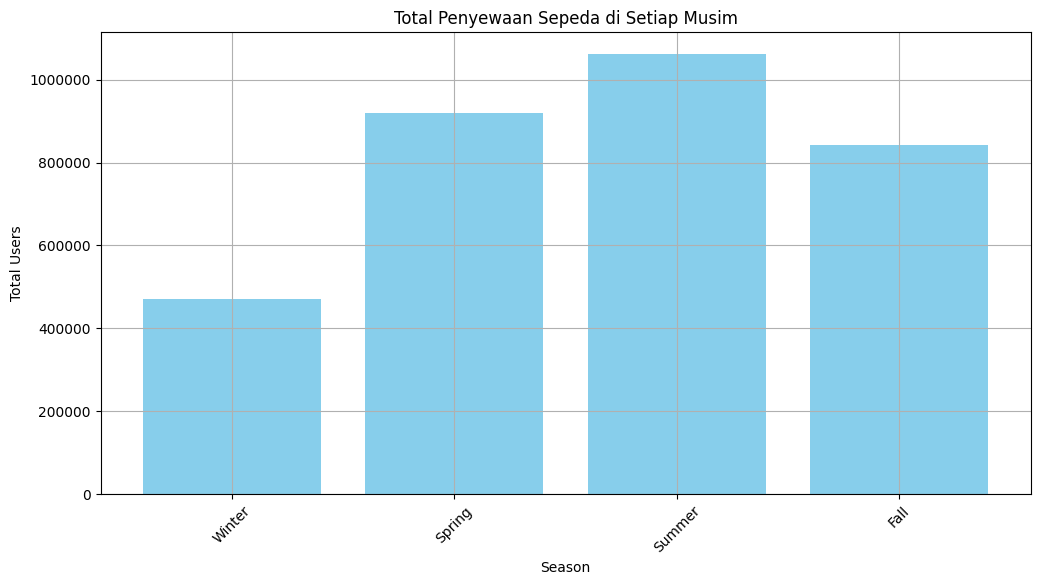

Penyewaan sepeda terbanyak terjadi di bulan Summer
Penyewaan sepeda terendah terjadi di bulan Winter


In [124]:
count_season = bike_df.groupby('season').agg({'cnt':'sum'}).reset_index()

season_highest = count_season.loc[count_season['cnt'].idxmax()]['season']
season_lowest = count_season.loc[count_season['cnt'].idxmin()]['season']

plt.figure(figsize=(12, 6))
plt.bar(count_season['season'], count_season['cnt'], color='skyblue')
plt.title('Total Penyewaan Sepeda di Setiap Musim')
plt.xlabel('Season')
plt.ylabel('Total Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

print(f"Penyewaan sepeda terbanyak terjadi di bulan {season_highest}")
print(f"Penyewaan sepeda terendah terjadi di bulan {season_lowest}")

### Pertanyaan 2: Pada hari apa rata-rata orang menyewwa sepeda?

<ipython-input-127-2ef16861374d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hour_average = bike_df.groupby('weekday').mean()


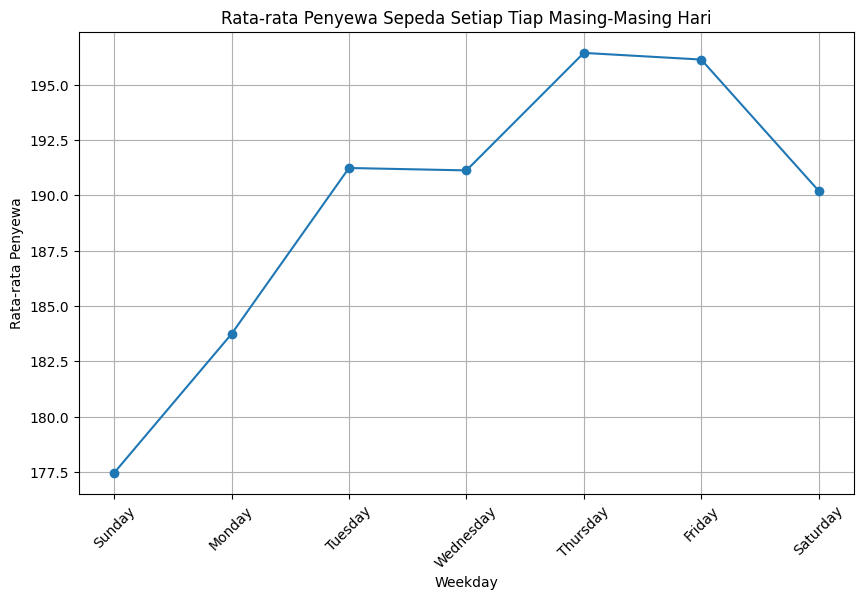

In [127]:
hour_average = bike_df.groupby('weekday').mean()

plt.figure(figsize=(10, 6))
plt.plot(hour_average.index, hour_average['cnt'], marker='o', linestyle='-')
plt.title('Rata-rata Penyewa Sepeda Setiap Tiap Masing-Masing Hari')
plt.xlabel('Weekday')
plt.ylabel('Rata-rata Penyewa')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan visualisasi dari bar chart yang ditampilkan untuk jumlah penyewa sepeda terbanyak terdapat pada musim kemarau dan jumlah penyewa sepeda terendah pada musim winter(musim dingin).
- Conclution pertanyaan 2 : Berdasarkan visualisai dari line chart yang ditampilkan, dapat dilihat bahwa rata-rata orang menyewa sepeda pada hari kamis, sedangakn rata-rata orang untuk tidak menyewa sepeda terdapat pada hari minggu.

In [126]:
bike_df.to_csv("bike_data.csv", index=False)